# BDTA 16: Calculate Relative Frequencies of Vocabulary

This takes a folder and builds a table of all words calculating their relative frequencies. It uses the [Pandas Data Analysis Library](http://pandas.pydata.org/). For help with Pandas see [Greg Reda's Intro to Pandas Data Structures](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/). 

Here is a way to get a folder of Gutenberg texts from NLTK if you don't have any yourself.

In [4]:
# import nltk
# use NTLK Gutenberg for convenience, but you could read any directory
# directory = nltk.data.find('corpora/gutenberg')

## Identify the folder

Here we check to see what folders of text we have. You can use different commands to navigate until you get to where your folder is.

In [2]:
%ls

2003-04FolderShortSIDToday/
AdamSavageComments.csv
BDTA Lesson 1 Using Jupyter.ipynb
BDTA Lesson 10 Basic CSV Extracting Contexts to File.ipynb
BDTA Lesson 10 Example.ipynb
BDTA Lesson 11 Regular Expressions.ipynb
BDTA Lesson 12 Concordances.ipynb
BDTA Lesson 13 Review of Reg Ex.ipynb
BDTA Lesson 14 Graphing Words.ipynb
BDTA Lesson 14.1 Solution.ipynb
BDTA Lesson 15 Simple Sentiment.ipynb
BDTA Lesson 16 Calculate Relative Frequencies.ipynb*
BDTA Lesson 17 Principal Component Analysis.ipynb
BDTA Lesson 2 Hello World.ipynb
BDTA Lesson 3 Lists.ipynb
BDTA Lesson 4 Review.ipynb
BDTA Lesson 5 Getting Text.ipynb
BDTA Lesson 6 Functions and For Loops.ipynb
BDTA Lesson 7 Review.ipynb
BDTA Lesson 8 Exploring a text with NLTK.ipynb
BDTA Lesson 8.1 If ... Then.ipynb
Basic Graphics.ipynb
Clout.png
FullText.txt
Hume Enquiry.txt
LIWCdatashort.csv
MockInterviewCorpus.csv
README.md
StoryOfWriting.txt
bigdata.txt
performanceConcordance.txt
theData.csv
theWritingStory.txt
truthConcordance.txt


Now we assign the name of the folder to a variable.

In [3]:
directory = "2003-04FolderShortSIDToday"

## Process text files in folder

This goes through the folder and processes all the text files. It tokenizes, counts, calculates relative frequencies and then adds to a dictionary for each file.

In [4]:
import glob, re, os, collections

# this dictionary will track our frequencies
docs = {}

# go through each txt file in the directory 
for file in glob.glob(directory + "/*.txt"):
    
    # read file as Latin 1 (remove encoding for UTF-8)
    with open(file, encoding="ISO-8859-1") as f:
        text = f.read();
        
        # tokenize
        tokens = re.findall(r'\b\w[\w-]*\b', text.lower())
        count = len(tokens)
        
        # convert to relative freqs
        relativefreqs = {}
        localfreqs = collections.Counter(tokens) # creates a data structure of words and counts
        for word, wordcount in localfreqs.items():
            
            # gather only words with alphabetical characters, discard numbers
            if word.isalpha():
                relativefreqs[word] = wordcount/count
            
        # add this document's relative freqs to our dictionary of all docs
        docs[os.path.basename(file)] = relativefreqs
        
print("Files processed: " + str(len(docs))) # prints out the type and length

Files processed: 16


## Convert into a dataframe

Now we convert the dictionary into a dataframe and show the top 20 rows.

In [5]:
import pandas as pd
df = pd.DataFrame(docs)
df.head(20)

,2003-04-01_SIDToday_-_Deployed_SIGINT_Analysts--An_Urgent_Need.pdf.txt,2003-04-01_SIDToday_-_Practical_Jokes_and_April_Fools.pdf.txt,2003-04-02_SIDToday_-_Last_QUICKMASK_Training_Today.pdf.txt,2003-04-02_SIDToday_-_New_Hire_Whats_On_Your_Mind_Session_--_Today.pdf.txt,2003-04-02_SIDToday_-_SIGINT_Strategy__The_Importance_of_Common_Goals.pdf.txt,2003-04-03_SIDToday_-_GEOCELL_Supports_IRAQI_FREEDOM.pdf.txt,2003-04-03_SIDToday_-_SID_Leadership_Transition_Passing_the_Baton.pdf.txt,2003-04-03_SIDToday_-_Schedule_for_3rd_and_4th_Quarter_Tools_Courses.pdf.txt,2003-04-04_SIDToday_-_Profiles_SID_Communications_and_Support_Operations.pdf.txt,2003-04-04_SIDToday_-_Read_All_About_Us.pdf.txt,2003-04-07_SIDToday_-_ICAP_Call_for_Applications.pdf.txt,2003-04-07_SIDToday_-_Support_to_UN_Diplomatic_Efforts_on_Iraq.pdf.txt,2003-04-08_SIDToday_-_Profile_SID_Registry_-_Grand_Central.pdf.txt,2003-04-08_SIDToday_-_Promotion_Cycle_Recap.pdf.txt,2003-04-09_SIDToday_-_Profile_SIGINT_Support_Services.pdf.txt,2003-04-09_SIDToday_-_Uncovering_North_Korea_Nuclear_Programs.pdf.txt
a,0.011111,0.016750,0.005587,0.009174,0.004651,0.011527,0.016035,0.002481,0.007722,0.013043,0.006873,0.004577,0.014563,0.004785,0.006098,0.012422
abilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001718,NaN,NaN,0.002392,NaN,NaN
ability,NaN,NaN,NaN,NaN,NaN,NaN,0.001458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
able,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
about,NaN,0.001675,NaN,NaN,0.002326,NaN,NaN,NaN,NaN,0.004348,NaN,NaN,0.002427,0.004785,NaN,NaN
above,NaN,NaN,0.005587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002392,NaN,NaN
abstruse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002174,NaN,NaN,NaN,NaN,NaN,NaN
accept,NaN,NaN,NaN,NaN,NaN,NaN,0.001458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accepted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003436,NaN,NaN,NaN,NaN,NaN
access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,2003-04-01_SIDToday_-_Deployed_SIGINT_Analysts--An_Urgent_Need.pdf.txt,2003-04-01_SIDToday_-_Practical_Jokes_and_April_Fools.pdf.txt,2003-04-02_SIDToday_-_Last_QUICKMASK_Training_Today.pdf.txt,2003-04-02_SIDToday_-_New_Hire_Whats_On_Your_Mind_Session_--_Today.pdf.txt,2003-04-02_SIDToday_-_SIGINT_Strategy__The_Importance_of_Common_Goals.pdf.txt,2003-04-03_SIDToday_-_GEOCELL_Supports_IRAQI_FREEDOM.pdf.txt,2003-04-03_SIDToday_-_SID_Leadership_Transition_Passing_the_Baton.pdf.txt,2003-04-03_SIDToday_-_Schedule_for_3rd_and_4th_Quarter_Tools_Courses.pdf.txt,2003-04-04_SIDToday_-_Profiles_SID_Communications_and_Support_Operations.pdf.txt,2003-04-04_SIDToday_-_Read_All_About_Us.pdf.txt,2003-04-07_SIDToday_-_ICAP_Call_for_Applications.pdf.txt,2003-04-07_SIDToday_-_Support_to_UN_Diplomatic_Efforts_on_Iraq.pdf.txt,2003-04-08_SIDToday_-_Profile_SID_Registry_-_Grand_Central.pdf.txt,2003-04-08_SIDToday_-_Promotion_Cycle_Recap.pdf.txt,2003-04-09_SIDToday_-_Profile_SIGINT_Support_Services.pdf.txt,2003-04-09_SIDToday_-_Uncovering_North_Korea_Nuclear_Programs.pdf.txt
count,154.000000,316.000000,104.000000,120.000000,197.000000,178.000000,308.000000,198.000000,127.000000,259.000000,240.000000,213.000000,208.000000,207.000000,167.000000,172.000000
mean,0.006061,0.003011,0.008380,0.007569,0.004805,0.005197,0.003157,0.002983,0.006992,0.003618,0.003852,0.004458,0.004411,0.004577,0.005349,0.005525
std,0.004787,0.004549,0.004799,0.005138,0.006731,0.005715,0.005040,0.005647,0.006224,0.004785,0.005564,0.006462,0.004810,0.006061,0.005211,0.005854
min,0.003704,0.001675,0.005587,0.004587,0.002326,0.002882,0.001458,0.001241,0.003861,0.002174,0.001718,0.002288,0.002427,0.002392,0.003049,0.003106
25%,0.003704,0.001675,0.005587,0.004587,0.002326,0.002882,0.001458,0.001241,0.003861,0.002174,0.001718,0.002288,0.002427,0.002392,0.003049,0.003106
50%,0.003704,0.001675,0.005587,0.004587,0.002326,0.002882,0.001458,0.001241,0.003861,0.002174,0.001718,0.002288,0.002427,0.002392,0.003049,0.003106
75%,0.007407,0.003350,0.011173,0.009174,0.004651,0.005764,0.002915,0.002481,0.007722,0.004348,0.003436,0.004577,0.004854,0.004785,0.006098,0.006211
max,0.044444,0.058626,0.039106,0.036697,0.067442,0.043228,0.046647,0.057072,0.030888,0.054348,0.058419,0.070938,0.033981,0.057416,0.033537,0.046584


## Sort by summed relative frequencies

Now we add a column with the sum of the relative frequencies for the documents and sort by that to see the high frequency words.

In [7]:
# sort the data frame by sum
df['Sum'] = df.sum(axis=1)
df.sort_values("Sum", ascending=False, inplace=True)
df[:20]

,2003-04-01_SIDToday_-_Deployed_SIGINT_Analysts--An_Urgent_Need.pdf.txt,2003-04-01_SIDToday_-_Practical_Jokes_and_April_Fools.pdf.txt,2003-04-02_SIDToday_-_Last_QUICKMASK_Training_Today.pdf.txt,2003-04-02_SIDToday_-_New_Hire_Whats_On_Your_Mind_Session_--_Today.pdf.txt,2003-04-02_SIDToday_-_SIGINT_Strategy__The_Importance_of_Common_Goals.pdf.txt,2003-04-03_SIDToday_-_GEOCELL_Supports_IRAQI_FREEDOM.pdf.txt,2003-04-03_SIDToday_-_SID_Leadership_Transition_Passing_the_Baton.pdf.txt,2003-04-03_SIDToday_-_Schedule_for_3rd_and_4th_Quarter_Tools_Courses.pdf.txt,2003-04-04_SIDToday_-_Profiles_SID_Communications_and_Support_Operations.pdf.txt,2003-04-04_SIDToday_-_Read_All_About_Us.pdf.txt,2003-04-07_SIDToday_-_ICAP_Call_for_Applications.pdf.txt,2003-04-07_SIDToday_-_Support_to_UN_Diplomatic_Efforts_on_Iraq.pdf.txt,2003-04-08_SIDToday_-_Profile_SID_Registry_-_Grand_Central.pdf.txt,2003-04-08_SIDToday_-_Promotion_Cycle_Recap.pdf.txt,2003-04-09_SIDToday_-_Profile_SIGINT_Support_Services.pdf.txt,2003-04-09_SIDToday_-_Uncovering_North_Korea_Nuclear_Programs.pdf.txt,Sum
the,0.014815,0.058626,0.039106,0.036697,0.067442,0.043228,0.046647,0.012407,0.030888,0.054348,0.058419,0.070938,0.031553,0.057416,0.030488,0.046584,0.699603
to,0.044444,0.030151,0.022346,0.027523,0.032558,0.025937,0.036443,0.057072,0.023166,0.015217,0.020619,0.043478,0.031553,0.045455,0.015244,0.027950,0.499157
and,0.014815,0.023451,0.016760,0.013761,0.016279,0.043228,0.040816,0.007444,0.030888,0.021739,0.037801,0.022883,0.021845,0.035885,0.018293,0.031056,0.396943
of,0.011111,0.025126,0.011173,0.009174,0.032558,0.031700,0.018950,0.002481,0.027027,0.039130,0.020619,0.025172,0.021845,0.019139,0.024390,0.018634,0.338229
u,0.007407,0.011725,0.016760,0.018349,0.011628,0.005764,0.007289,0.007444,0.019305,0.008696,0.018900,0.009153,0.016990,0.014354,0.021341,0.015528,0.210634
is,0.018519,0.008375,0.016760,0.013761,0.018605,0.008646,0.010204,0.003722,0.007722,0.013043,0.010309,0.006865,0.012136,0.009569,0.015244,0.009317,0.182797
in,0.011111,0.015075,0.005587,0.018349,0.011628,0.025937,0.020408,0.003722,NaN,0.023913,0.003436,0.013730,NaN,0.011962,0.006098,NaN,0.170955
on,0.011111,0.018425,0.011173,0.018349,0.006977,0.017291,0.004373,0.001241,0.003861,0.008696,0.013746,0.016018,0.007282,0.009569,0.009146,0.006211,0.163469
sid,0.007407,NaN,NaN,0.018349,0.009302,0.005764,0.001458,0.001241,0.030888,NaN,0.008591,0.002288,0.033981,0.011962,0.024390,0.003106,0.158726
sigint,0.014815,0.001675,0.005587,0.013761,0.030233,0.002882,0.007289,NaN,0.023166,0.002174,0.001718,0.009153,0.007282,NaN,0.024390,0.012422,0.156547


We can calculate the length or number of rows in the dataframe.

In [8]:
len(df)

1471

## Export dataframe to a CSV

Now we export the dataframe to a CSV file. Make sure you don't overwrite another one that is useful.

In [9]:
FileName = "FrequenciesResultsShort.csv" # assign a file name
df.to_csv(FileName) # write out to CSV
print("Done")

Done


### What can you do with the CSV?

The CSV can be openned in Excel and you can edit it. You could sort it by different texts or words. You can delete the rows for the words you are not interested in. You can then import the CSV into the Principal Component Analysis notebook to see what the components are.

Now we can check to see what the start of the file contains.

In [11]:
!head -n 3 FrequenciesResultsShort.csv

,2003-04-01_SIDToday_-_Deployed_SIGINT_Analysts--An_Urgent_Need.pdf.txt,2003-04-01_SIDToday_-_Practical_Jokes_and_April_Fools.pdf.txt,2003-04-02_SIDToday_-_Last_QUICKMASK_Training_Today.pdf.txt,2003-04-02_SIDToday_-_New_Hire_Whats_On_Your_Mind_Session_--_Today.pdf.txt,2003-04-02_SIDToday_-_SIGINT_Strategy__The_Importance_of_Common_Goals.pdf.txt,2003-04-03_SIDToday_-_GEOCELL_Supports_IRAQI_FREEDOM.pdf.txt,2003-04-03_SIDToday_-_SID_Leadership_Transition_Passing_the_Baton.pdf.txt,2003-04-03_SIDToday_-_Schedule_for_3rd_and_4th_Quarter_Tools_Courses.pdf.txt,2003-04-04_SIDToday_-_Profiles_SID_Communications_and_Support_Operations.pdf.txt,2003-04-04_SIDToday_-_Read_All_About_Us.pdf.txt,2003-04-07_SIDToday_-_ICAP_Call_for_Applications.pdf.txt,2003-04-07_SIDToday_-_Support_to_UN_Diplomatic_Efforts_on_Iraq.pdf.txt,2003-04-08_SIDToday_-_Profile_SID_Registry_-_Grand_Central.pdf.txt,2003-04-08_SIDToday_-_Promotion_Cycle_Recap.pdf.txt,2003-04-09_SIDToday_-_Profile_SIGINT_Support_Services.pdf.txt,200

## Flip the dataframe

Now we flip the dataframe so we can operate on the words. Note that you can save this dataframe too as a CSV if you want.

In [12]:
df2 = df.transpose()
df2.head(20)

,the,to,and,of,u,is,in,on,sid,sigint,...,pending,bump,group,intro,introduction,signed,unable,ais,demystifying,required
2003-04-01_SIDToday_-_Deployed_SIGINT_Analysts--An_Urgent_Need.pdf.txt,0.014815,0.044444,0.014815,0.011111,0.007407,0.018519,0.011111,0.011111,0.007407,0.014815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01_SIDToday_-_Practical_Jokes_and_April_Fools.pdf.txt,0.058626,0.030151,0.023451,0.025126,0.011725,0.008375,0.015075,0.018425,NaN,0.001675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-02_SIDToday_-_Last_QUICKMASK_Training_Today.pdf.txt,0.039106,0.022346,0.016760,0.011173,0.016760,0.016760,0.005587,0.011173,NaN,0.005587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-02_SIDToday_-_New_Hire_Whats_On_Your_Mind_Session_--_Today.pdf.txt,0.036697,0.027523,0.013761,0.009174,0.018349,0.013761,0.018349,0.018349,0.018349,0.013761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-02_SIDToday_-_SIGINT_Strategy__The_Importance_of_Common_Goals.pdf.txt,0.067442,0.032558,0.016279,0.032558,0.011628,0.018605,0.011628,0.006977,0.009302,0.030233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-03_SIDToday_-_GEOCELL_Supports_IRAQI_FREEDOM.pdf.txt,0.043228,0.025937,0.043228,0.031700,0.005764,0.008646,0.025937,0.017291,0.005764,0.002882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-03_SIDToday_-_SID_Leadership_Transition_Passing_the_Baton.pdf.txt,0.046647,0.036443,0.040816,0.018950,0.007289,0.010204,0.020408,0.004373,0.001458,0.007289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-03_SIDToday_-_Schedule_for_3rd_and_4th_Quarter_Tools_Courses.pdf.txt,0.012407,0.057072,0.007444,0.002481,0.007444,0.003722,0.003722,0.001241,0.001241,NaN,...,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241
2003-04-04_SIDToday_-_Profiles_SID_Communications_and_Support_Operations.pdf.txt,0.030888,0.023166,0.030888,0.027027,0.019305,0.007722,NaN,0.003861,0.030888,0.023166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-04_SIDToday_-_Read_All_About_Us.pdf.txt,0.054348,0.015217,0.021739,0.039130,0.008696,0.013043,0.023913,0.008696,NaN,0.002174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get rid of Sum row

We are next going to start plotting words across the texts so we need to get rid of the Sum row.

In [13]:
df3 = df2.drop(['Sum'])
df3.head(18)

,the,to,and,of,u,is,in,on,sid,sigint,...,pending,bump,group,intro,introduction,signed,unable,ais,demystifying,required
2003-04-01_SIDToday_-_Deployed_SIGINT_Analysts--An_Urgent_Need.pdf.txt,0.014815,0.044444,0.014815,0.011111,0.007407,0.018519,0.011111,0.011111,0.007407,0.014815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01_SIDToday_-_Practical_Jokes_and_April_Fools.pdf.txt,0.058626,0.030151,0.023451,0.025126,0.011725,0.008375,0.015075,0.018425,NaN,0.001675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-02_SIDToday_-_Last_QUICKMASK_Training_Today.pdf.txt,0.039106,0.022346,0.016760,0.011173,0.016760,0.016760,0.005587,0.011173,NaN,0.005587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-02_SIDToday_-_New_Hire_Whats_On_Your_Mind_Session_--_Today.pdf.txt,0.036697,0.027523,0.013761,0.009174,0.018349,0.013761,0.018349,0.018349,0.018349,0.013761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-02_SIDToday_-_SIGINT_Strategy__The_Importance_of_Common_Goals.pdf.txt,0.067442,0.032558,0.016279,0.032558,0.011628,0.018605,0.011628,0.006977,0.009302,0.030233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-03_SIDToday_-_GEOCELL_Supports_IRAQI_FREEDOM.pdf.txt,0.043228,0.025937,0.043228,0.031700,0.005764,0.008646,0.025937,0.017291,0.005764,0.002882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-03_SIDToday_-_SID_Leadership_Transition_Passing_the_Baton.pdf.txt,0.046647,0.036443,0.040816,0.018950,0.007289,0.010204,0.020408,0.004373,0.001458,0.007289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-03_SIDToday_-_Schedule_for_3rd_and_4th_Quarter_Tools_Courses.pdf.txt,0.012407,0.057072,0.007444,0.002481,0.007444,0.003722,0.003722,0.001241,0.001241,NaN,...,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241
2003-04-04_SIDToday_-_Profiles_SID_Communications_and_Support_Operations.pdf.txt,0.030888,0.023166,0.030888,0.027027,0.019305,0.007722,NaN,0.003861,0.030888,0.023166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-04_SIDToday_-_Read_All_About_Us.pdf.txt,0.054348,0.015217,0.021739,0.039130,0.008696,0.013043,0.023913,0.008696,NaN,0.002174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Save the flipped file

In [14]:
FileName = "FrequenciesResultsShortFlip.csv" # assign a file name
df3.to_csv(FileName, na_rep=0) # write out to CSV
print("Done")

Done


## Graphing a word over the files

Now we can graph different words over the files we have.

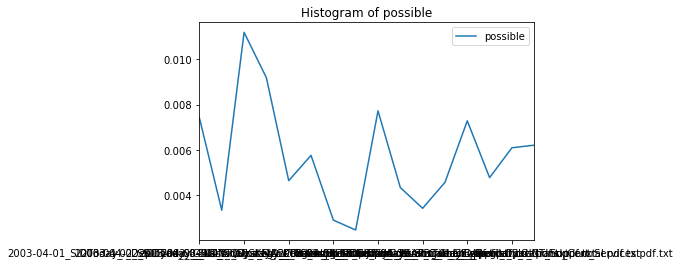

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word2Plot = "possible" # change this to see different words

plt.figure(figsize=(16, 16))
# plt.rcParams.update({'font.size': 12})
df3[[word2Plot]].plot()
plt.title('Histogram of ' + word2Plot)
plt.show()

*Note* that the labels on the X axis are hard to read. It may be best to rename your text files or edit the CSV.